<h1 align="center">Analysis of Algorithms</h1>

### Scientific method applied to analysis of algorithms

A framework for predicting performance and comparing algorithms.

Scientific method:<br>
- **Observe** some feature of the natural world.
- **Hypothesize** a model that is consistent with the observations.
- **Predict** events using the hypothesis.
- **Verify** the predictions by making further observations.
- **Validate** by repeating until the hypothesis and observations agree.

Principles:<br>
- **Experiments** must be reproducible.
- **Hypotheses** must be falsifiable.

To give an idea of the difference between running algorithms with linear, linearithm and quadractic complexity, the plot below illustrates such curves using only 50 points. The higher the number of points, the higher the distance between $N\ log\ N$ and $N^2$ algorithms.

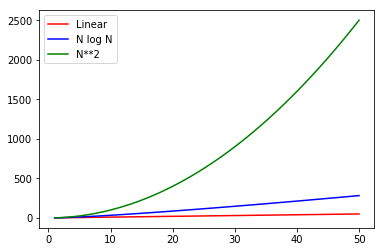

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

n = 50
x = []
linear, nlogn, n2 = [], [], []
for i in range(1, n+1):
    x.append(i)
    linear.append(i)
    nlogn.append(i*np.log2(i))
    n2.append(i**2)
plt.plot(x, linear, 'r-', label='Linear')
plt.plot(x, nlogn, 'b-', label='N log N')
plt.plot(x, n2, 'g-', label='N**2')
plt.legend()
plt.show()

# Questions

1. Suppose that $n$ equals 1 million. Approximately how much faster is an algorithm that performs $n \lg n$ operations versus one that performs $n^2$ operations? Recall that $\lg$ is the base-2 logarithm function.<br>

&#9744; 20x<br>
&#9744; 1,000x<br>
&#9745; 50,000x<br>
&#9744; 1,000,000x

In [3]:
# Solution
import numpy as np
n = 1000000
nlogn = n*np.log2(n)
n2 = n**2
print float(n2)/nlogn

50171.66594399687


2. Suppose that you make the following observations of the running time $T(n)$ (in seconds) of a program as a function of the input size $n$. Which of the following functions best models the running time $T(n)$?

|    n   | T(n) |
| ------ | ---- |
|  1,000 |  0.0 |
|  2,000 |  0.0 |
|  4,000 |  0.1 |
|  8,000 |  0.3 |
| 16,000 |  1.3 |
| 32,000 |  5.1 |
| 64,000 | 20.5 |

&#9744; $3.3 \times 10^{-4} \times n$<br>
&#9744; $n^2$<br>
&#9745; $5.0 \times 10^{-9} \times n^2$<br> 
&#9744; $6.25 \times 10^{-9} \times n^2$

**Solution**: The solution is presented below:

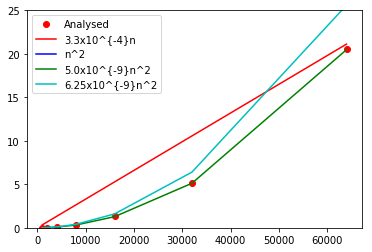

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

x = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
curve = [0.0, 0.0, 0.1, 0.3, 1.3, 5.1, 20.5]
a, b, c, d = [], [], [], []
for i in x:
    a.append(3.3*(10**-4)*i)
    b.append(i**2)
    c.append(5.0*(10**-9)*(i**2))
    d.append(6.25*(10**-9)*(i**2))

plt.plot(x, curve, 'ro', label='Analysed')
plt.plot(x, a, 'r-', label='3.3x10^{-4}n')
plt.plot(x, b, 'b-', label='n^2')
plt.plot(x, c, 'g-', label='5.0x10^{-9}n^2')
plt.plot(x, d, 'c-', label='6.25x10^{-9}n^2')
plt.ylim((0, 25))
plt.legend()
plt.show()
